##Задание:
Понизить размерность текстовых данных<br>
Проанализировать потери информации.

###Что делаем
Переводим текст в векторную форму. Оцениваем потери информации при уменьшении размерности с использованием PCA методов. Строим график зависимости потери информации от n (где n это размерность нашей выборки).


In [1]:
#Загрузка файла. Если загрузка не требуеться: пропустить. 
from google.colab import files

uploaded = files.upload()
filename=''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  filename=fn

Saving 1400-0.txt to 1400-0.txt
User uploaded file "1400-0.txt" with length 1049619 bytes


In [0]:
import spacy
import codecs
import re
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer 
import string

Далее мы отфильтровываем сразу загруженный текст. Удаляем лишние символы, даты а так же слова которые входят в список стоп слов. 

In [0]:
with open(filename,'r',encoding='utf8') as file:
    document=file.read().splitlines()
import re
pattern = r"[^\[A-Za-z-]+]" #удаляем все кроме слов. На выходе у нас остаються только слова.
for i in range(len(document)):
  document[i]=re.sub(pattern, "", document[i])


In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words("english") #реализовать фильтрацию.
for i in range(len(document)):
  for j in stop:
    document[i].replace(j,'')
  for j in string.punctuation:
    document[i].replace(j,'')  
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
document=list(filter(None, document)) #удалим пустые строки. 

Код ниже может провести лемметизацию текста. Однако существенного смысла я не вижу в этом действии. Объем текста при этом не измениться но читабельность ухудшиться. 
---

In [0]:
import nltk
nltk.download('punkt')
#проведем леммитизацию. 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
for i in range(len(document)):
  word_list = nltk.word_tokenize(document[i])
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  document[i]=lemmatized_output



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


---

In [6]:
#Проверяем приблизительную длину нашего отфильтрованного текста. 
j=0
for i in range(len(document)):
  j+=len(document[i])
j


993016

In [0]:
file_obj = codecs.open(filename,"r",encoding='utf-8')
data_list = file_obj.readlines()
string=''
for line in data_list: 
    string+=line.strip()
string=re.sub(pattern, "", string)
for j in stop:
    string.replace(j,'')


In [8]:
#Проверяем приблизительную длину нашего отфильтрованного текста. 
len(string)

992800

###tensorflow
Разобьем данные при помощи методов tensorflow. Постоим гистограммы потери данных. Оценим результат.<br>
tensorflow очень много делает за нас. Нам нужно только указать сколько слов мы хотим использовать. 

**Tokenizer** - этот класс который позволяет векторизовать корпус текста, превращая каждый текст в последовательность целых чисел (каждое целое число является индексом токена в словаре) или в вектор.

По умолчанию все знаки препинания удаляются, превращая тексты в разделенные пробелами последовательности слов

Эти последовательности затем разбиваются на списки токенов. Затем они будут проиндексированы или векторизованы.

Другими словами мы можем не проводить предобработку текста перед подачей его сюда (условно, так как цифры останоуться)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer #токинайзер керас
tokenizer = Tokenizer(num_words=2000)  #берем 2000 наиболее часто употребляемых слов
documentnew=document.copy()
tokenizer.fit_on_texts(documentnew)#индекс

sequences = tokenizer.texts_to_sequences(documentnew)#преобразование текста в последовательность целых чисел (при необходимости)
sequences=list(filter(None, sequences)) #это представление строки где закодированны номера слов. 

In [0]:
sequences

In [35]:
one_hot_results = tokenizer.texts_to_matrix(documentnew, mode='binary')#прямое бинарное представление - можно использовать "binary", "count", "tfidf", "freq".
one_hot_results.shape

(16262, 2000)

In [0]:
tokenizer.get_config() #конфигурация токинайзера.

{'char_level': False,
 'document_count': 16262,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"5": 4014, "1444": 11, "3073": 4, "32": 785, "132": 204, "261": 83, "3072": 4, "6696": 1, "249": 88, "566": 33, "2267": 6, "36": 743, "2621": 5, "2": 5839, "18": 1728, "20": 1530, "1": 6295, "401": 50, "49": 531, "22": 1336, "44": 588, "1268": 13, "11": 2358, "3766": 3, "14": 1706, "433": 46, "155": 160, "1116": 13, "43": 577, "254": 86, "165": 159, "4775": 2, "174": 151, "1069": 16, "3074": 4, "2268": 6, "520": 36, "1269": 13, "3075": 4, "2269": 6, "3767": 3, "6697": 1, "6699": 1, "1693": 9, "4776": 2, "3768": 3, "6698": 1, "6700": 1, "6701": 1, "3076": 4, "1850": 8, "6702": 1, "145": 183, "3077": 4, "4777": 2, "3769": 3, "3078": 4, "2622": 5, "576": 32, "262": 84, "6703": 1, "6704": 1, "729": 25, "3770": 3, "1270": 13, "3079": 4, "55": 437, "3771": 3, "6705": 1, "757": 24, "3772": 3, "42": 633, "6706": 1, "533": 36, "168": 158, "222": 105, "4778": 2, "6709": 1, "6": 35

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2000)
XPCAreduced = pca.fit_transform(one_hot_results)

cumsum() возвращает накопленную сумму. (элемент 1 +2+3... накопленная сумма всех элементов =1 

In [0]:
finalarray=pca.explained_variance_ratio_.cumsum() 

In [0]:
finalarray

array([0.03747035, 0.06616313, 0.09194438, ..., 0.99999386, 1.        ,
       1.        ])

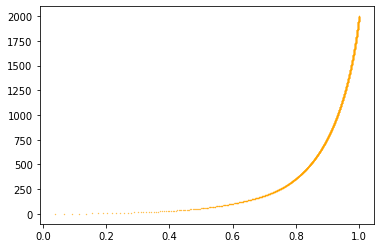

In [0]:
plt.scatter(finalarray, range(0,len(finalarray)), c="orange", s=0.1)

In [0]:
for i in range(len(finalarray)):
    if finalarray[i]>0.8:
        print('Размерность, на которой тереться ~20% информации ',i)
        print('Подение размерности при уменьшеии объема информации,',2000/i)
        break

Размерность, на которой тереться ~20% информации  346
Подение размерности при уменьшеии объема информации, 5.780346820809249


Без cumsum() для сравнения. explained_variance_ratio_ возвращает % отклонений на каждом этапе ротаций (100%=1).

In [0]:
finalarray=pca.explained_variance_ratio_

In [0]:
finalarray

array([4.62097478e-02, 3.03124461e-02, 2.58822123e-02, ...,
       8.30367135e-06, 6.00836382e-06, 4.43061610e-33])

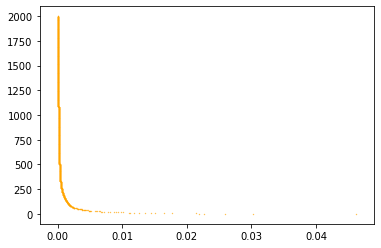

In [0]:
plt.scatter(finalarray, range(0,len(finalarray)), c="orange", s=0.1)

Таким образом можно уменьшить размерность массива в более чем 6 раза, при этом потеря информации будет менее 20%.  

In [0]:
count_hot_results = tokenizer.texts_to_matrix(documentnew, mode='count')
#прямое бинарное представление - можно использовать "binary", "count", "tfidf", "freq" из коробки.
count_hot_results.shape

(16262, 2000)

In [0]:
count_hot_results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2000)
XPCAreduced = pca.fit_transform(count_hot_results)

In [0]:
finalarray=pca.explained_variance_ratio_.cumsum()

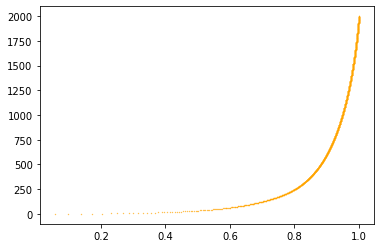

In [0]:
plt.scatter(finalarray, range(0,len(finalarray)), c="orange", s=0.1)

In [0]:
for i in range(len(finalarray)):
    if finalarray[i]>0.8:
        print('Размерность, на которой тереться ~20% информации ',i)
        print('Подение размерности при уменьшеии объема информации,',2000/i)
        break

Размерность, на которой тереться ~20% информации  248
Подение размерности при уменьшеии объема информации, 8.064516129032258


В данном случае возможно уменьшение размерности более чем в 5 раз. 

Данный метод разбивки наиболее простой и понятный. 

---

In [0]:
#некоторые методы из preprocessing.text
import tensorflow.keras.preprocessing.text as tx
documentnew=document.copy()
one_hot = tx.one_hot(string,n=3000) 
hash_tr = tx.hashing_trick(string,n=3000) 
text_to_wd = tx.text_to_word_sequence(string) 


In [0]:
one_hot[25:35]

[2127, 2498, 840, 1942, 7, 2592, 7, 2920, 2869, 2454]

In [0]:
hash_tr[25:35]

[2127, 2498, 840, 1942, 7, 2592, 7, 2920, 2869, 2454]

In [0]:
text_to_wd[25:35]

['whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'orre', 'use']

---

###CountVectorizer

In [0]:
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
documents=document.copy()# копируем наш list

In [0]:
import re
sentence = string
pattern = r"[^\[A-Za-z-]+]" #удаляем все кроме слов
for i in range(len(documents)):
  documents[i]=re.sub(pattern, "", documents[i])

In [0]:
documents=list(filter(None, documents))#удаляем пустые ячейки

In [73]:
nltk.download('stopwords')
stop = stopwords.words("english") #реализовать фильтрацию.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(documents).todense()
feature_names = count_vectorizer.get_feature_names()
test=pd.DataFrame(bag_of_words, columns = feature_names)

In [75]:
bag_of_words.shape

(16262, 10989)

В данном случае у нас разряженная матрица и с ней PCA не работает. Нужно или преводить к не разряженной матрице или использовать метод SparsePCA

In [0]:
from sklearn.decomposition import PCA,SparsePCA,TruncatedSVD
tpca=TruncatedSVD(n_components = 10988)
spca=SparsePCA(n_components = 10989)
pca = PCA(n_components = 10989)


In [0]:
%%time
PCAreduced = pca.fit_transform(test)

CPU times: user 2h 47min 39s, sys: 20min 42s, total: 3h 8min 22s
Wall time: 4min 58s


In [0]:
import scipy
bag_of_words=scipy.sparse.csr_matrix(bag_of_words)

In [88]:
%%time
PCAreduced = tpca.fit_transform(bag_of_words)

CPU times: user 1h 7min 55s, sys: 1min 2s, total: 1h 8min 58s
Wall time: 4min 39s


In [0]:
tfinalarray=tpca.explained_variance_ratio_.cumsum()

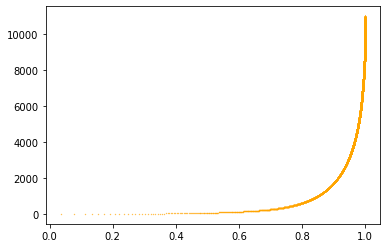

In [91]:
plt.scatter(tfinalarray, range(0,len(tfinalarray)), c="orange", s=0.1);

In [0]:
finalarray=pca.explained_variance_ratio_.cumsum()

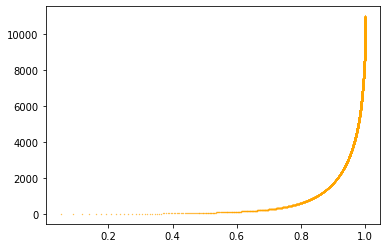

In [0]:
plt.scatter(finalarray, range(0,len(finalarray)), c="orange", s=0.1)

In [0]:
for i in range(len(finalarray)):
    if finalarray[i]>0.8:
        print('Размерность, на которой тереться ~20% информации ',i)
        break

Размерность, на которой тереться ~20% информации  607


In [0]:
10989/607


18.10378912685338

Таким образом возможно ужатие информации более чем в 18 раз....
Разряженные матрицы не использовал.


---

В качестве дополнительного примера попробуем поработать с данными с использованием PCA методов (например возьмем какой нибудь датасет и посмотрим на потери информации при уменьшении размерности)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
#Загрузка файла. Если загрузка не требуеться: пропустить. 
from google.colab import files

uploaded = files.upload()
filename=''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  filename=fn

Saving MFOcredit.csv to MFOcredit (1).csv
User uploaded file "MFOcredit.csv" with length 4571791 bytes


В качестве примера взят сет из предыдущего ДЗ.

In [0]:
data = pd.read_csv(filename, encoding='cp1251', sep=';',parse_dates = [ 'date_start','date_end'])

Мы не будем сильно вдоваться в предобработку данных (мы делали это в предыдущем ДЗ)

In [0]:
data.drop(['id','date_start','date_end'], axis = 1, inplace = True)

In [0]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [0]:
data.shape

(35212, 11)

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11).fit(data)
new_df = pca.transform(data)
var_exp = pca.explained_variance_ratio_.cumsum()


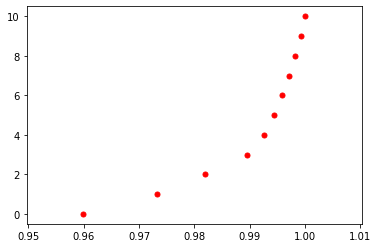

In [0]:
plt.scatter(var_exp, range(0,len(var_exp)), c="red", s=25)

В данном случае можно довольно легко приводить данные к данным меньшего размера(размерности) а потом в этих данных искать выбросы, что бы отфильтровать их (например)

---
word2vec

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [0]:
#sentences = nltk.word_tokenize(string)

In [0]:
#len(sentences)

213652

In [0]:
import tensorflow.keras.preprocessing.text as tx
words=[]
for i in range(len(document)):
  words.append(tx.text_to_word_sequence(document[i]))
#words = nltk.word_tokenize(string)   

In [0]:
model = Word2Vec(words, min_count=1)

In [45]:
print(model)

Word2Vec(vocab=11849, size=100, alpha=0.025)


In [46]:
model.wv.vectors.shape[0]

11849

In [47]:
words_model = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [48]:
len(model.wv.vocab)

11849

In [0]:
#model.most_similar('the', topn=3)

In [0]:
 model.wv.vectors[1]

array([-0.69579434, -0.71327835,  0.18227834, -0.3195909 , -0.19556116,
       -0.4877976 , -1.2561092 , -0.49305063, -0.3745127 , -1.6980273 ,
       -0.14762227,  0.63479775,  0.01940923, -0.15251851,  0.27067822,
       -0.7677434 , -1.141956  , -0.20771298,  0.28824297, -0.02032876,
       -0.5179602 , -0.82278377,  0.13692042, -0.79285425,  0.86230457,
       -0.39351457, -0.7612103 ,  1.0276492 ,  0.6248436 ,  0.57800573,
        0.59087574,  0.15334679, -0.7728608 ,  1.0930852 ,  0.7027006 ,
        0.90439427, -0.16143884, -0.19057642,  0.64190894,  0.2790274 ,
        0.76556176, -0.5624321 ,  0.31812632, -0.3521821 , -0.83497006,
       -0.885533  ,  0.48083565, -0.09137394, -0.66954863, -0.3162055 ,
        0.26720902,  0.25549838, -0.91591346,  0.48921874, -0.03216855,
       -0.0374291 ,  0.50809443,  0.5418095 ,  0.17531309, -0.26508525,
        0.82144034,  0.35601664,  0.15352228, -0.5935436 ,  0.0666444 ,
       -0.266047  ,  0.56632274,  0.2655643 ,  0.05203164,  0.10

In [0]:
pca = PCA(n_components=100).fit(words_model)
new_df = pca.transform(words_model)
var_exp = pca.explained_variance_ratio_.cumsum()

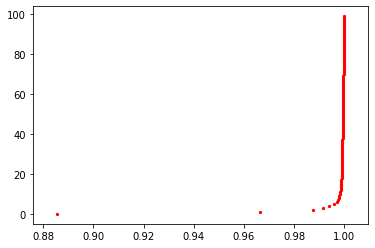

In [0]:
plt.scatter(var_exp, range(0,len(var_exp)), c="red", s=5)

In [0]:
for i in range(len(var_exp)):
    if var_exp[i]>0.8:
        print('Размерность, на которой тереться ~20% информации ',i)
   
        break

Размерность, на которой тереться ~20% информации  0


w2v возвращает многомерный (100 мерный) вектор... 

---
tensorflow Embedding

In [0]:
#данный код запуститься тольков colab
try:
    %tensorflow_version 2.x
except Exception:
    pass
'''try:
  #если вы не используете colab раскоментируйте этот код, вод выше удалить
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass   ''' 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



TensorFlow 2.x selected.


In [12]:
from gensim.models import word2vec,Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer#токинайзер керас

sentences = word2vec.Text8Corpus(filename)
sentences = [' '.join(sent) for sent in sentences]
import tensorflow.keras.preprocessing.text as tx
words=[]
for i in range(len(sentences)):
  words.append(tx.text_to_word_sequence(sentences[i]))


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
a=[]
for i in words[18:19]:
  for j in i:
    a.append(j) 


In [0]:
test=Word2Vec(a[30:50], min_count=1,size=2)

In [15]:
print(test)

Word2Vec(vocab=22, size=2, alpha=0.025)


In [16]:
words_model = test[test.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [17]:
words_model.shape

(22, 2)

In [31]:
tests=a[29:51]
len(tests)

22

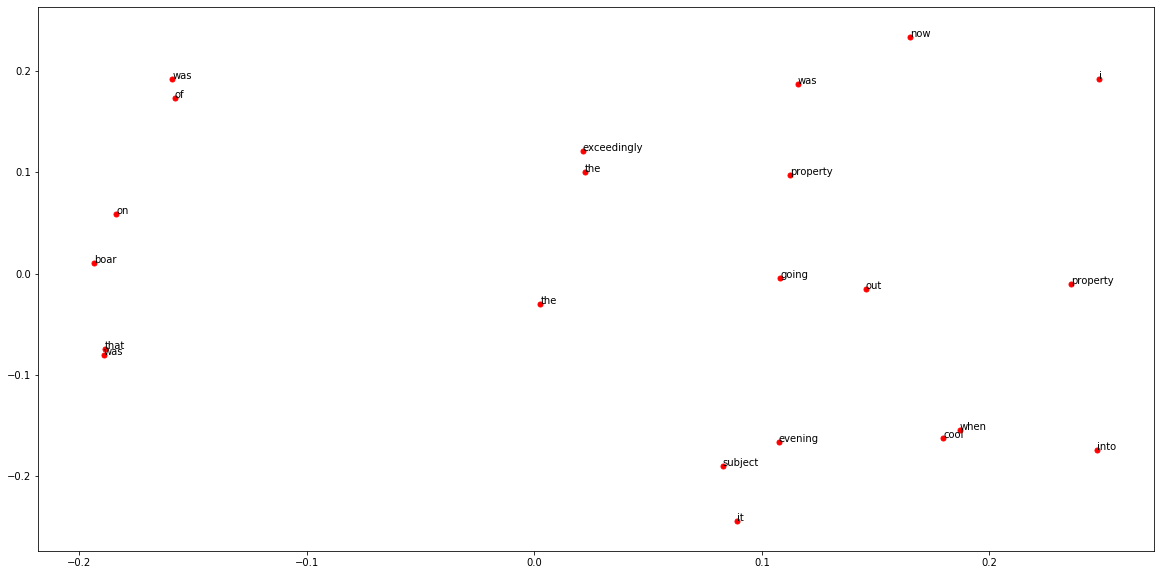

In [32]:
plt.figure(figsize=(20,10))
ax = plt.gca()
for k in range(len(tests)):
      ax.annotate(tests[k],xy=(words_model[k]))
#plt.annotate(frozenset=12)
plt.scatter(words_model[:,0], words_model[:,1], c="red", s=25);

---

---
gensim . Что мы делаем - загружаем уже готовую модель, после чего токенизируем наш текст (разделяем на массив слов), получаеться в итоге 2х мерный массив слов, - далее мы передаем слова в модель (проверяем есть ли слово, так как не все слова есть в модели) - после чего добавляем вектор в наш итоговый массив. 

In [0]:
import spacy 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

In [0]:
import tensorflow.keras.preprocessing.text as tx
words=[]
for i in range(len(document)):
  words.append(tx.text_to_word_sequence(document[i]))

Честно говоря этот вариант рабоатет хуже tf.

In [0]:
#book_result = [word for word in nltk.word_tokenize(result) #берем очищенную строку делим на слова
#               if word not in string.punctuation # удаляем знаки препинания
#               and word not in spacy.lang.en.stop_words.STOP_WORDS] #и стоп слова



In [0]:
#listToStr = ' '.join([str(elem) for elem in book_result]) 


In [0]:
from pprint import pprint as print
from gensim.models.fasttext import FastText as FT_gensim
from gensim.test.utils import datapath
corpus_file = datapath('lee_background.cor')
model = FT_gensim(size=100)


model.build_vocab(corpus_file=corpus_file)

model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words
)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
a=[]
for i in words:
  for j in i:
    if j in model.wv.vocab:
      a.append(model[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
len(a)

129128

In [0]:
pca = PCA(n_components=100).fit(a)
new_df = pca.transform(a)
var_exp = pca.explained_variance_ratio_.cumsum()

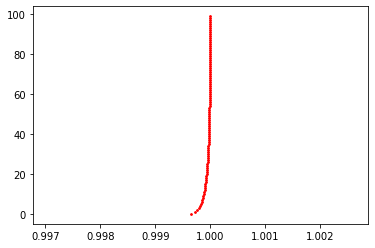

In [0]:
plt.scatter(var_exp, range(0,len(var_exp)), c="red", s=3)

Несколько примеров работы с обученной моделью (model). Как мы видим из графиков, предварительно обученные модели позволяют легко уменьшать размерность практически без потери информации, что намного эффективнее чем перевод текста в разряженную матрицу. В дальнейшем стоит использовать только их. 

###Выводы:
Применение PCA методов в части уменьшения размерности позволяет уменьшить размерность изначального датасета во много раз. Данный метод позволяет уменьшать пространства большой размерности в пространства меньшей размерности. В дальнейшем это может быть использовано для поиска выбросов, решения задачи классифкации без учителя и т д. 

tf в себе уже имеет готовые инструменты для токенизации текста. 

Предварительно обученные модели на основе w2v или FT_gensim  возвращают готовый вектор на основе предварительно обучепнной модели нужной размерности. В случае если размерность 2 или 3, она легко представляеться в виде трехмерной модели. По которой в теории можно анализировать близасть слов друг к другу. Для просмотра визуализированных слов можно использовать сервис типа http://projector.tensorflow.org/ 
В дальнейшем этот вектор может быть использован для поиска похожих слов, зависимостей и так далее. 

Для работы с разряженными матрицами можно использовать TruncatedSVD который эффективно работает с cipy.sparse матрицами. 

---